# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: David Rodriguez-Mayorquin

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [8]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.8
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.1.0
fastjsonsc

Question 1. 

Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [9]:
import requests
import pickle

# URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# request to get the HTML content
response = requests.get(url)
html_content = response.text

# determine pkl file name
file_name = "article.pkl"

# Save HTML content to a pickle file
with open(file_name, "wb") as file:
    pickle.dump(html_content, file)

print(f"HTML content saved to {file_name}")


HTML content saved to article.pkl


Question 2. 

Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [11]:
import pickle
from bs4 import BeautifulSoup

# Load HTML content from article.pkl
file_name = "article.pkl"
with open(file_name, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract and print the text
article_text = soup.get_text()
print(article_text[:1000])



















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype

Question 3. 

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [3]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the article text
file_name = "article.pkl"
with open(file_name, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text()

# Load spaCy
nlp = spacy.load("en_core_web_sm")

# Locate main content
main_content = soup.find("div", class_="entry-content")
article_text = main_content.get_text() if main_content else ""

# Process text with spaCy
doc = nlp(article_text)

# Filtered tokens
tokens = [
    token.text.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most frequent tokens
most_common_tokens = token_freq.most_common(5)

# Print most frequent tokens
print("The 5 most frequent tokens are:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}', Frequency: {freq}")


The 5 most frequent tokens are:
Token: 'laser', Frequency: 30
Token: 'headlights', Frequency: 17
Token: 'technology', Frequency: 10
Token: 'headlight', Frequency: 10
Token: 'led', Frequency: 10


Question 4. 

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [4]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter

# Load the article HTML content from the pickle file
file_name = "article.pkl"
with open(file_name, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML with BeautifulSoup and attempt to extract the main article content
soup = BeautifulSoup(html_content, "html.parser")

# Locate the main content within the <div class="entry-content"> tag
main_content = soup.find("div", class_="entry-content")
article_text = main_content.get_text() if main_content else ""

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Process the main article text with spaCy
doc = nlp(article_text)

# Filter out tokens and use lemmas: exclude stopwords, punctuation, and whitespace
filtered_lemmas = [
    token.lemma_.lower() for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count the frequency of the filtered lemmas
lemma_frequencies = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_frequencies.most_common(5)

# Print the most frequent lemmas and their frequencies
print("5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}', Frequency: {freq}")


5 Most Frequent Lemmas (excluding stopwords, punctuation, and whitespace):
Lemma: 'laser', Frequency: 35
Lemma: 'headlight', Frequency: 26
Lemma: 'beam', Frequency: 12
Lemma: 'technology', Frequency: 10
Lemma: 'led', Frequency: 10


Question 5. 

Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [6]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def score_sentence_by_token(sentence, interesting_tokens):
    
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Count the occurrences of interesting tokens (in lowercase)
    interesting_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    
    # Calculate score: number of interesting tokens / total tokens in the sentence
    score = interesting_count / len(doc) if len(doc) > 0 else 0
    return score

def score_sentence_by_lemma(sentence, interesting_lemmas):
    
    # Process the sentence with spaCy
    doc = nlp(sentence)
    
    # Count the occurrences of interesting lemmas (in lowercase)
    interesting_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)
    
    # Calculate score: number of interesting lemmas / total tokens in the sentence
    score = interesting_count / len(doc) if len(doc) > 0 else 0
    return score

# Sample list of frequent tokens and lemmas from previous questions (replace these with your actual results)
frequent_tokens = ['laser', 'light', 'technology', 'headlight', 'automotive']  # Example tokens
frequent_lemmas = ['laser', 'light', 'technology', 'headlight', 'automotive']  # Example lemmas

# Extract the first sentence from the article text
article_text = "Laser headlights are a new and exciting technology in automotive lighting."  # Replace with actual article text
doc = nlp(article_text)
first_sentence = list(doc.sents)[0].text

# Calculate scores
token_score = score_sentence_by_token(first_sentence, frequent_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, frequent_lemmas)

# Print results
print(f"Token-based score for the first sentence: {token_score}")
print(f"Lemma-based score for the first sentence: {lemma_score}")


Token-based score for the first sentence: 0.25
Lemma-based score for the first sentence: 0.3333333333333333


Question 6. 

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

Token scores for each sentence: [0.0, 0.08695652173913043, 0.0, 0.030303030303030304, 0.0, 0.07142857142857142, 0.2, 0.2, 0.07692307692307693, 0.043478260869565216, 0.058823529411764705, 0.16666666666666666, 0.0, 0.041666666666666664, 0.1, 0.038461538461538464, 0.16666666666666666, 0.08333333333333333, 0.08333333333333333, 0.03125, 0.0, 0.0, 0.08695652173913043, 0.05357142857142857, 0.04, 0.029411764705882353, 0.2, 0.05128205128205128, 0.0, 0.041666666666666664, 0.05128205128205128, 0.05, 0.0, 0.05405405405405406, 0.0, 0.0, 0.0, 0.0, 0.0625, 0.05555555555555555, 0.02564102564102564, 0.0, 0.0, 0.0, 0.1, 0.11363636363636363, 0.030303030303030304, 0.06666666666666667, 0.09090909090909091, 0.034482758620689655, 0.034482758620689655, 0.02702702702702703, 0.07692307692307693, 0.1, 0.03571428571428571, 0.0]


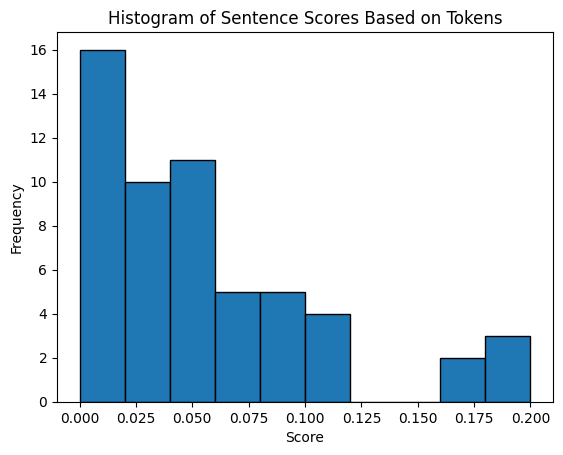

In [13]:
import pickle
from bs4 import BeautifulSoup
import spacy
from collections import Counter
import matplotlib.pyplot as plt

# Load the article HTML content from the pickle file
file_name = "article.pkl"
with open(file_name, "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML with BeautifulSoup and attempt to extract the main article content
soup = BeautifulSoup(html_content, "html.parser")

# Locate the main content within the <div class="entry-content"> tag
main_content = soup.find("div", class_="entry-content")
article_text = main_content.get_text() if main_content else ""

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Define the score function for tokens
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    interesting_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)
    score = interesting_count / len(doc) if len(doc) > 0 else 0
    return score

# List of frequent tokens from previous analysis
frequent_tokens = ['laser', 'light', 'technology', 'headlight', 'automotive']

# Process the article to split it into sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Calculate scores for each sentence based on tokens
sentence_scores = [score_sentence_by_token(sentence.text, frequent_tokens) for sentence in sentences]

# Print the token scores for each sentence
print("Token scores for each sentence:", sentence_scores)

# Plot a histogram of the scores
plt.hist(sentence_scores, bins=10, edgecolor='black')
plt.title("Histogram of Sentence Scores Based on Tokens")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# The most common range of scores seems to be between 0 and 0.025

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).